In [20]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [25]:
def pca_vs_lr_dtc(xtrain, ytrain, xtest, ytest, d, dump_out=True):
    pca = PCA(n_components=d)
    xptrain = pca.fit_transform(xtrain)
    xptest = pca.transform(xtest)
    # LR accuracy
    lr = LogisticRegression()
    lr.fit(xptrain, ytrain)
    lrscore = lr.score(xptest, ytest)
    # DTC accuracy
    dtc = DecisionTreeClassifier()
    dtc.fit(xptrain, ytrain)
    dtcscore = dtc.score(xptest, ytest)
    if dump_out:
        print('D = {}'.format(d))
        print('LR accuracy: {}'.format(lrscore))
        print('DTC accuracy: {}'.format(dtcscore))
    else:
        return lrscore, dtcscore

# MNIST

In [9]:
mnist = fetch_mldata('MNIST original', data_home='../Data')
mxtrain, mxtest, mytrain, mytest = train_test_split(mnist.data, mnist.target, test_size=0.33, random_state=42)

## D=5

In [10]:
pca_vs_lr_dtc(mxtrain, mytrain, mxtest, mytest, 5)

D = 5
LR accuracy: 0.6483116883116883
DTC accuracy: 0.6625108225108225


## D=20

In [11]:
pca_vs_lr_dtc(mxtrain, mytrain, mxtest, mytest, 20)

D = 20
LR accuracy: 0.8638528138528139
DTC accuracy: 0.8418181818181818


***compare results with problem 1 accuracy**

# Spambase

In [14]:
def spambasedata():
    f = open('../Data/spambase.data')
    target = []
    spam_data = []    
    for line in f.readlines():
        target.append(int(line[-2]))
        line = line[:-3].strip().split(',')
        spam_data.append(list(map(float, line)))
    target = np.array(target)
    f.close()
    f = open('../Data/spambase.names')
    names = []
    for line in f.readlines()[33:]:
        names.append(line.strip().split(':')[0])
    f.close()
    return spam_data, target, names

sdata, starget, snames = spambasedata()

In [19]:
sxtrain, sxtest, sytrain, sytest = train_test_split(sdata, starget, test_size=0.33, random_state=42)

Text(0.5,0,'No. of dimensions')

Text(0,0.5,'Scores; LR(red), DTC(blue)')

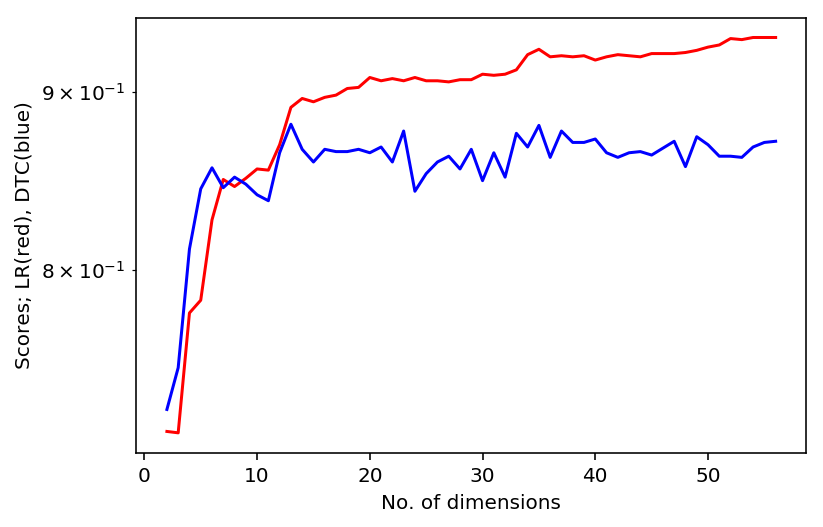

In [27]:
lr_scores = []
dtc_scores = []
for d in range(2, len(sdata[0])):
    ls, dts = pca_vs_lr_dtc(sxtrain, sytrain, sxtest, sytest, d, dump_out=False)
    lr_scores.append(ls)
    dtc_scores.append(dts)

plt.plot(range(2, len(sdata[0])), lr_scores, 'r')
plt.plot(range(2, len(sdata[0])), dtc_scores, 'b')
plt.xlabel('No. of dimensions')
plt.ylabel('Scores; LR(red), DTC(blue)')
plt.yscale('log')